# Import & Initial Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/AmazonSalesData.csv')

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
df.shape

(100, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
df.isna().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [ ]:
df.dtypes

,0
Region,object
Country,object
Item Type,object
Sales Channel,object
Order Priority,object
Order Date,object
Order ID,int64
Ship Date,object
Units Sold,int64
Unit Price,float64


In [ ]:
#Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [ ]:
df.sample()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75


In [ ]:
for i in df.columns:
    if df[i].dtype == 'object' or df[i].nunique() < 10:
        print(f"Unique values of the column {i} :- {df[i].unique()}\n")
        print("Value Counts of the column"  ,df[i].value_counts(), "\n\n")
        print('-'*70)

Unique values of the column Region :- ['Australia and Oceania' 'Central America and the Caribbean' 'Europe'
 'Sub-Saharan Africa' 'Asia' 'Middle East and North Africa'
 'North America']

Value Counts of the column Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64 


----------------------------------------------------------------------
Unique values of the column Country :- ['Tuvalu' 'Grenada' 'Russia' 'Sao Tome and Principe' 'Rwanda'
 'Solomon Islands' 'Angola' 'Burkina Faso' 'Republic of the Congo'
 'Senegal' 'Kyrgyzstan' 'Cape Verde' 'Bangladesh' 'Honduras' 'Mongolia'
 'Bulgaria' 'Sri Lanka' 'Cameroon' 'Turkmenistan' 'East Timor' 'Norway'
 'Portugal' 'New Zealand' 'Moldova ' 'France' 'Kiribati' 'Mali'
 'The Gambia' 'Switzerl

Summary of Section 1

- The dataset contains 100 records and 14 columns related to Amazon’s sales transactions.

- No missing values and no duplicates -> dataset is clean structurally.

- 7 columns are categorical (e.g., Region, Country, Item Type, Sales Channel, Order Priority, Order Date, Ship Date), while 7 are numeric.

- Units Sold range from 124 to 9925, with a mean of ~5129. The distribution is slightly right-skewed (mean > median).

- Unit Price and Unit Cost vary a lot, from low-cost items like fruits (~9.3) to high-value items like office supplies (~651).

- Total Revenue is highly skewed, with a few very large sales driving the mean (mean ~1.37M, median ~0.75M).

- Total Profit also shows positive skewness (mean ~442k vs median ~291k), suggesting a few very high-profit orders.

- Categorical columns like Sales Channel (Online/Offline), Order Priority (H, M, L, C), and Region show limited unique values suitable for grouping and hypothesis testing.

# Section 2 (Data Cleaning) :-

In [ ]:
# Extract useful date features
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Quarter'] = df['Order Date'].dt.quarter

In [ ]:
# Shipping duration in days
df['Shipping_Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Shipping_Duration'].describe()

,Shipping_Duration
count,100.000000
mean,23.360000
std,14.742586
min,0.000000
25%,9.750000
50%,23.500000
75%,36.250000
max,50.000000


In [ ]:
# Consistency check -> Revenue, Cost, Profit
df['Check_Revenue'] = df['Units Sold'] * df['Unit Price']
df['Check_Cost'] = df['Units Sold'] * df['Unit Cost']
df['Check_Profit'] = df['Check_Revenue'] - df['Check_Cost']

In [ ]:
df.sample()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Year,Order_Month,Order_Quarter,Shipping_Duration,Check_Revenue,Check_Cost,Check_Profit
80,Europe,Spain,Household,Offline,L,2012-10-21,213487374,2012-11-30,4513,668.27,502.54,3015902.51,2267963.02,747939.49,2012,10,4,40,3015902.51,2267963.02,747939.49


In [ ]:
# Compare with given columns
print("Revenue difference:", round((df['Total Revenue'] - df['Check_Revenue']).abs().sum()))
print("Cost difference:", round((df['Total Cost'] - df['Check_Cost']).abs().sum()))
print("Profit difference:", round((df['Total Profit'] - df['Check_Profit']).abs().sum()))

Revenue difference: 0
Cost difference: 0
Profit difference: 0


In [ ]:
#There is no difference so let's drop these temporary columns

In [ ]:
df.drop(['Check_Revenue' , 'Check_Cost' , 'Check_Profit'] , axis = 1 , inplace = True)

In [ ]:
df.sample(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Year,Order_Month,Order_Quarter,Shipping_Duration
19,Australia and Oceania,East Timor,Meat,Online,L,2012-07-31,322067916,2012-09-11,5908,421.89,364.69,2492526.12,2154588.52,337937.60,2012,7,3,42
48,Europe,Macedonia,Clothes,Offline,C,2014-10-14,787399423,2014-11-14,7842,109.28,35.84,856973.76,281057.28,575916.48,2014,10,4,31


In [ ]:
# Identify numeric columns
num_cols = ['Units Sold', 'Unit Price', 'Unit Cost',
            'Total Revenue', 'Total Cost', 'Total Profit', 'Shipping_Duration']

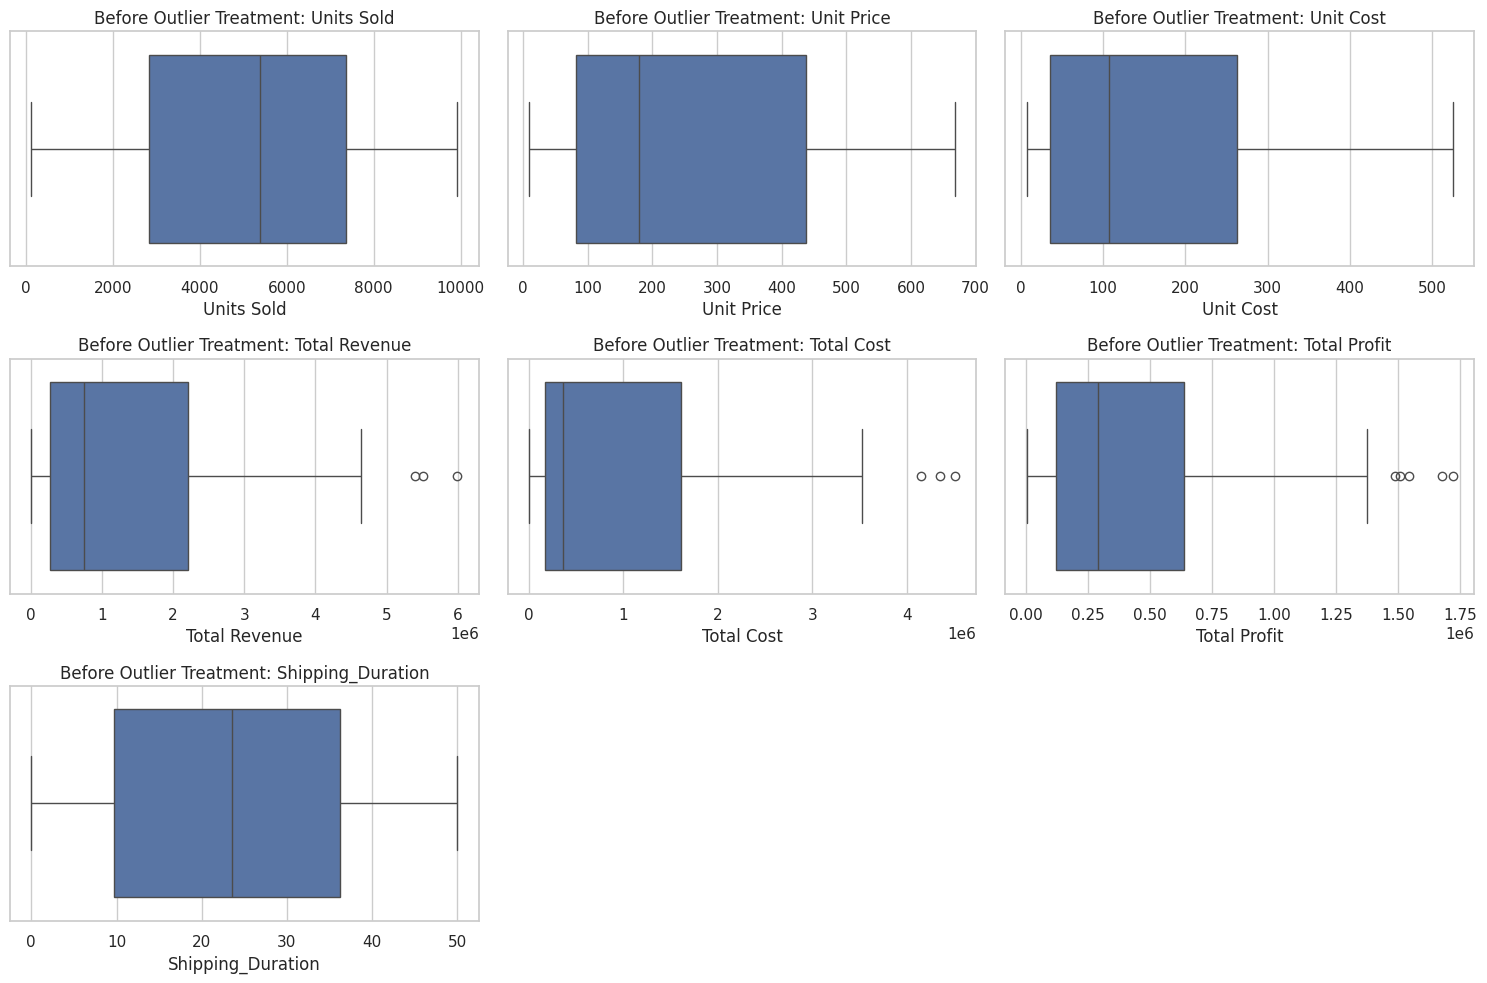

In [ ]:
# Boxplots before Outlier treatment
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col])
    plt.title(f"Before Outlier Treatment: {col}")
plt.tight_layout()
plt.show()

In [ ]:
# IQR-based Outlier Treatment
def iqr_outlier_treatment(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers instead of removing
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

for col in num_cols:
    df = iqr_outlier_treatment(df, col)

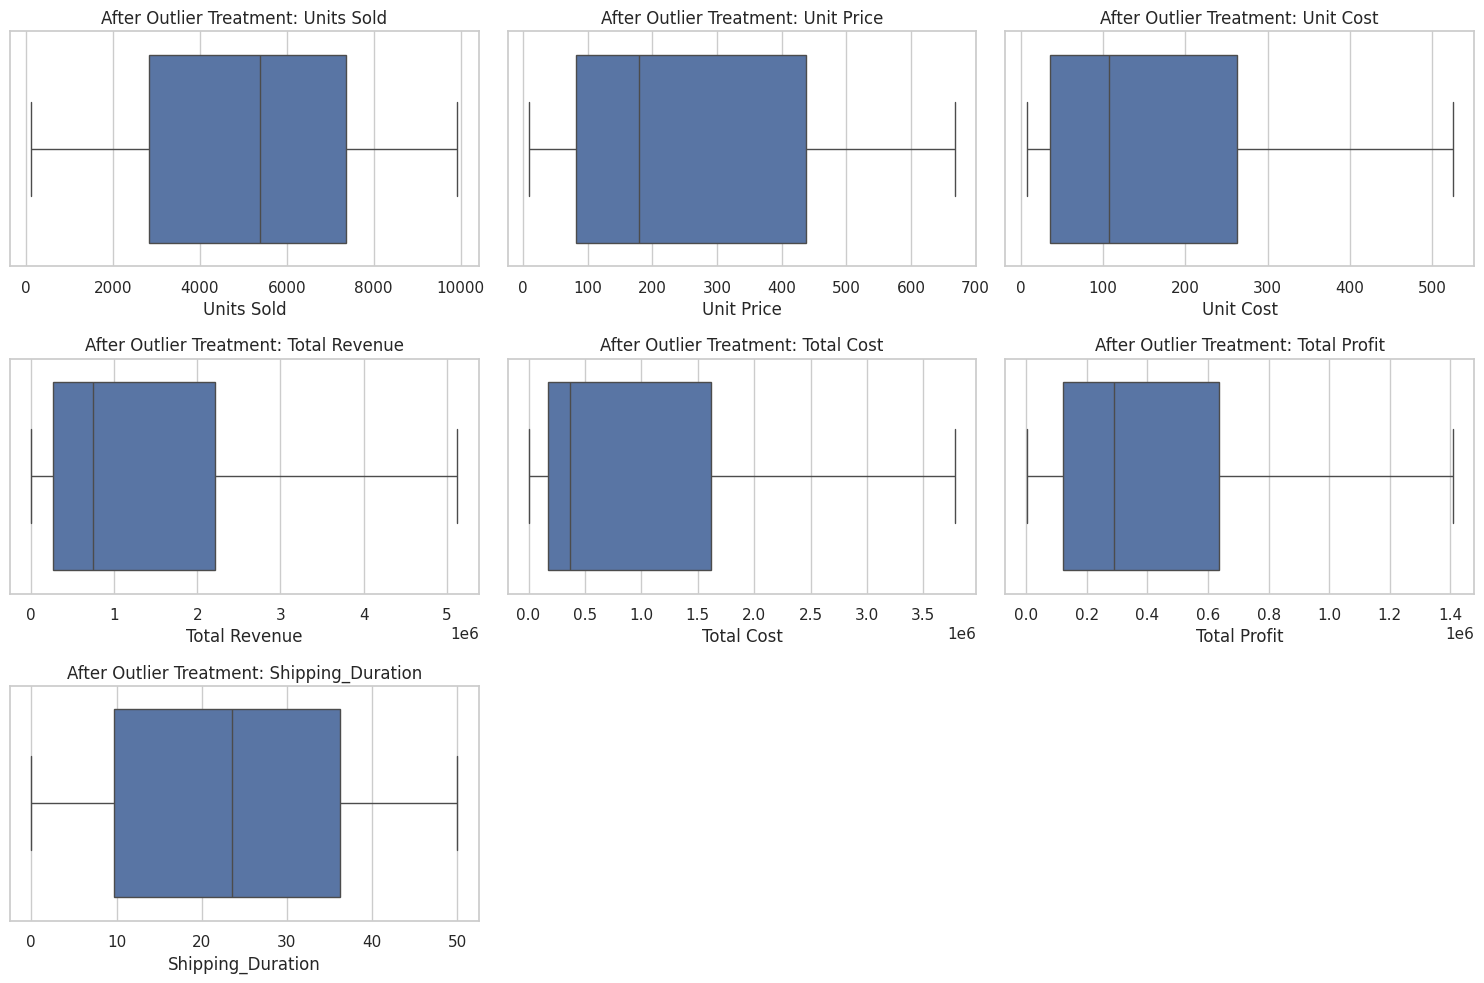

In [ ]:
# Boxplots after treatment
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col])
    plt.title(f"After Outlier Treatment: {col}")
plt.tight_layout()
plt.show()

- We can observe there are only few outliers before now those are also not there after IQR treatment

# Section 3: Exploratory Data Analysis

In [ ]:
# Overall totals
total_revenue = df['Total Revenue'].sum()
total_cost = df['Total Cost'].sum()
total_profit = df['Total Profit'].sum()

print("Total Revenue:", total_revenue)
print("Total Cost:", total_cost)
print("Total Profit:", total_profit)

Total Revenue: 135822998.2225
Total Cost: 91518594.18750001
Total Profit: 43271914.1125


<Figure size 1500x800 with 0 Axes>

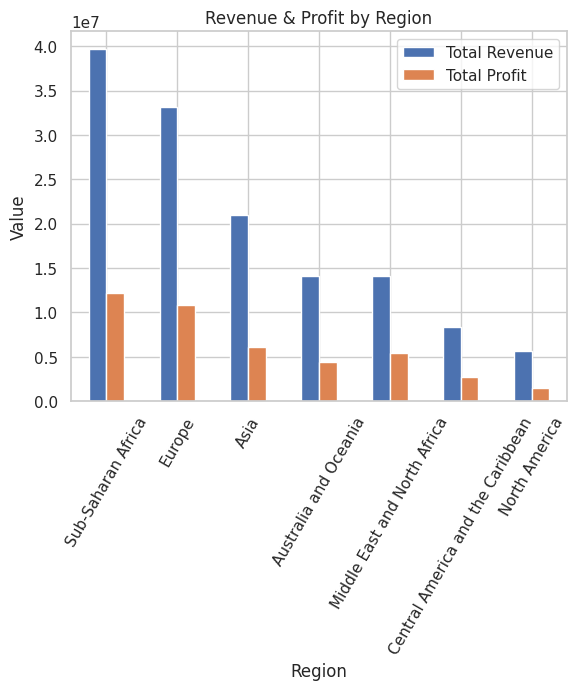

In [ ]:
# Sales by Region

# Revenue & Profit by Region
region_summary = df.groupby('Region')[['Total Revenue', 'Total Profit']].sum().sort_values(by='Total Revenue', ascending=False)

plt.figure(figsize=(15,8))
region_summary[['Total Revenue', 'Total Profit']].plot(kind='bar')
plt.title("Revenue & Profit by Region")
plt.ylabel("Value")
plt.xticks(rotation=60)
plt.show()

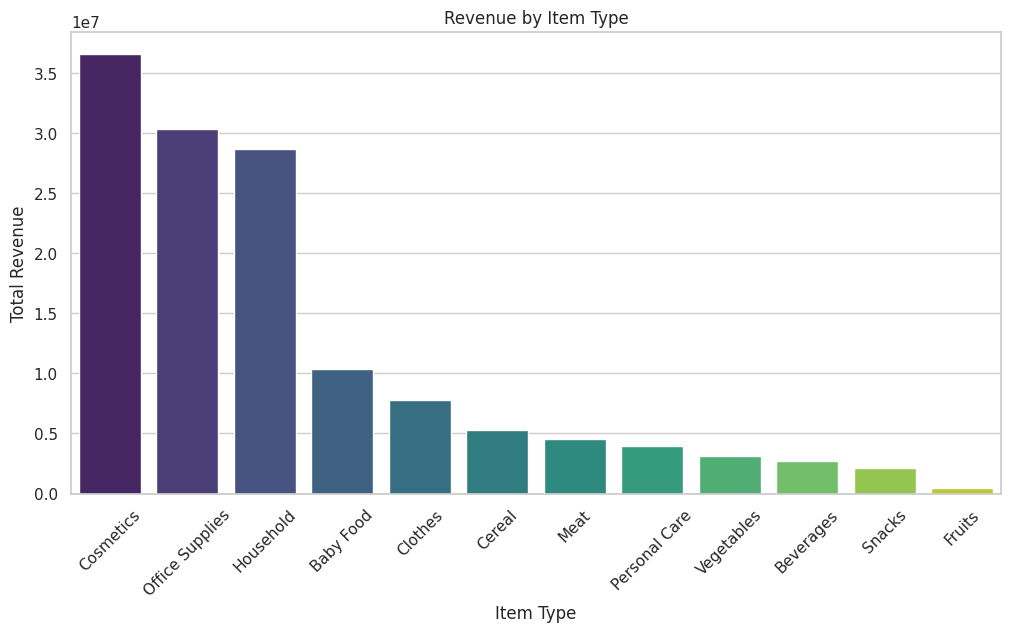

In [ ]:
# Revenue & Profit by Item Type
item_summary = df.groupby('Item Type')[['Total Revenue', 'Total Profit']].sum().sort_values(by='Total Revenue', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=item_summary.index, y=item_summary['Total Revenue'] , palette='viridis')
plt.xlabel("Item Type")
plt.title("Revenue by Item Type")
plt.xticks(rotation=45)
plt.show()

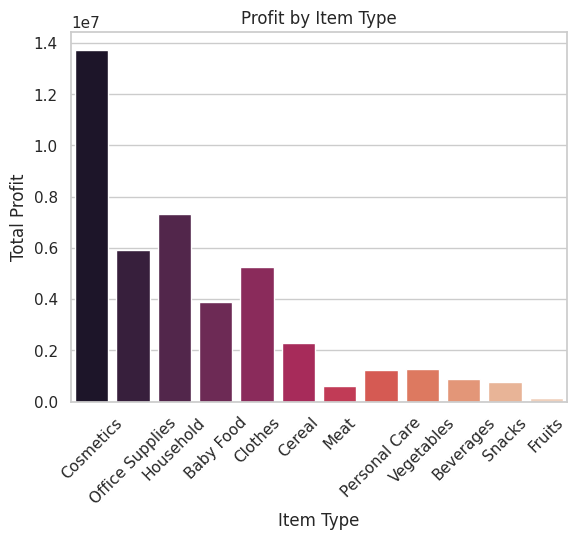

In [ ]:
sns.barplot(x=item_summary.index, y=item_summary['Total Profit'] , palette='rocket')
plt.xlabel("Item Type")
plt.title("Profit by Item Type")
plt.xticks(rotation=45)
plt.show()

<Figure size 600x400 with 0 Axes>

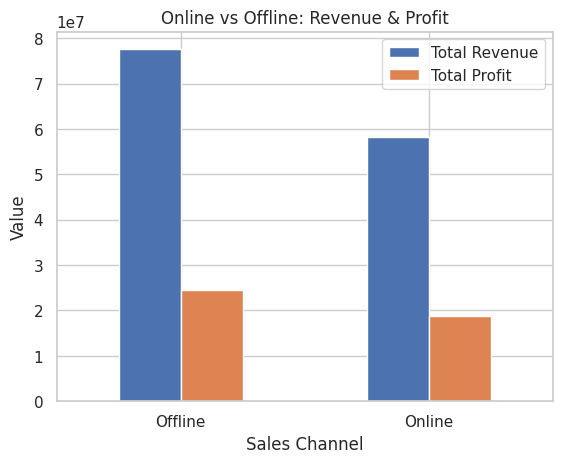

In [ ]:
# Compare Online vs Offline
channel_summary = df.groupby('Sales Channel')[['Total Revenue', 'Total Profit']].sum()

plt.figure(figsize=(6,4))
channel_summary.plot(kind='bar', legend=True)
plt.title("Online vs Offline: Revenue & Profit")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.show()

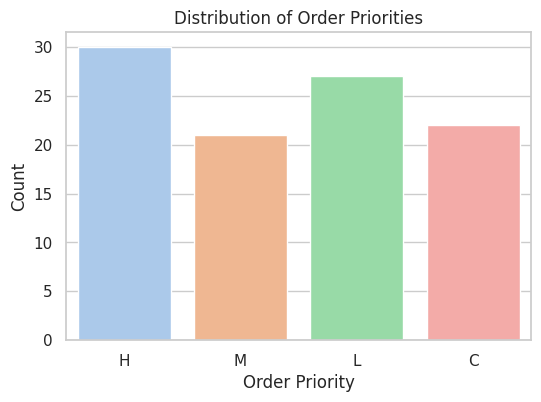

In [ ]:
#  Order Priority Counts
plt.figure(figsize=(6,4))
sns.countplot(x='Order Priority', data=df, order=['H','M','L','C'] , palette='pastel')
plt.xlabel("Order Priority")
plt.ylabel("Count")
plt.title("Distribution of Order Priorities")
plt.show()

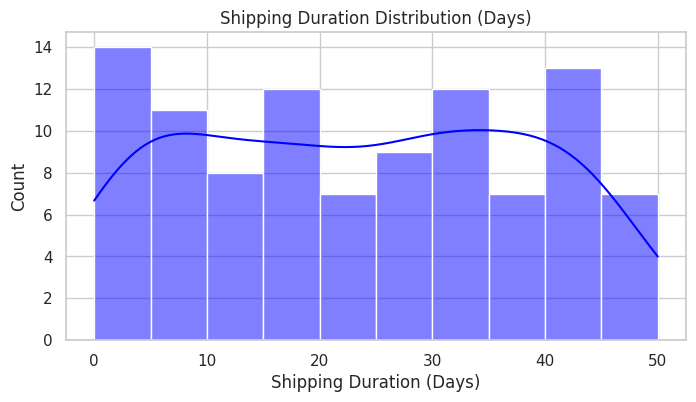

In [ ]:
# Shipping duration distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Shipping_Duration'], bins=10, kde=True , color='blue')
plt.xlabel("Shipping Duration (Days)")
plt.title("Shipping Duration Distribution (Days)")
plt.show()

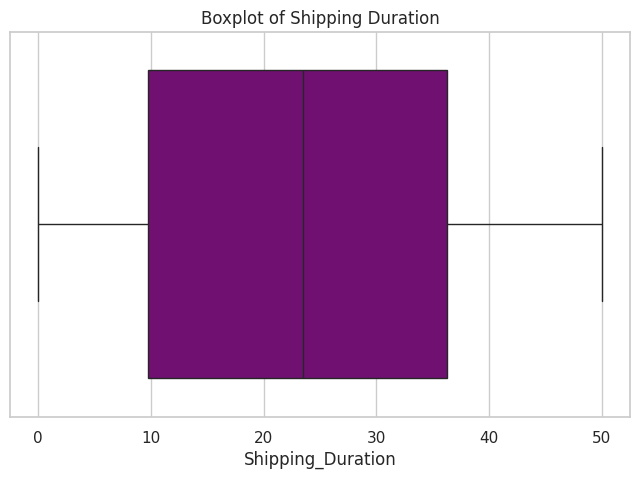

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Shipping_Duration'] , color = 'Purple')
plt.title("Boxplot of Shipping Duration")
plt.show()

# Section 4: Univariate Analysis

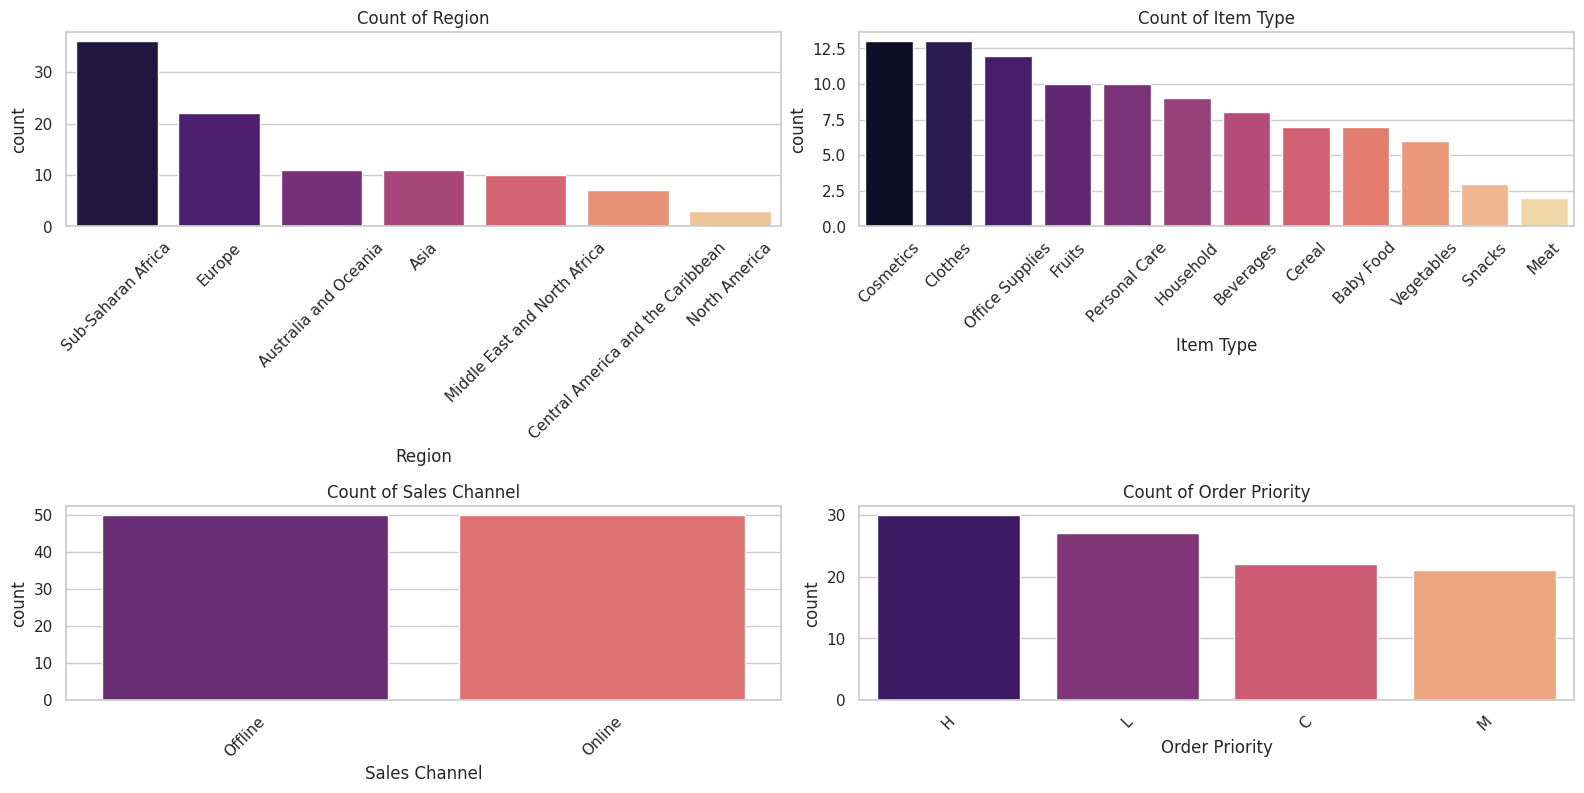

In [ ]:
# Categorical columns
cat_cols = ['Region', 'Item Type', 'Sales Channel', 'Order Priority']

plt.figure(figsize=(16,12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3,2,i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index , palette = 'magma')
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

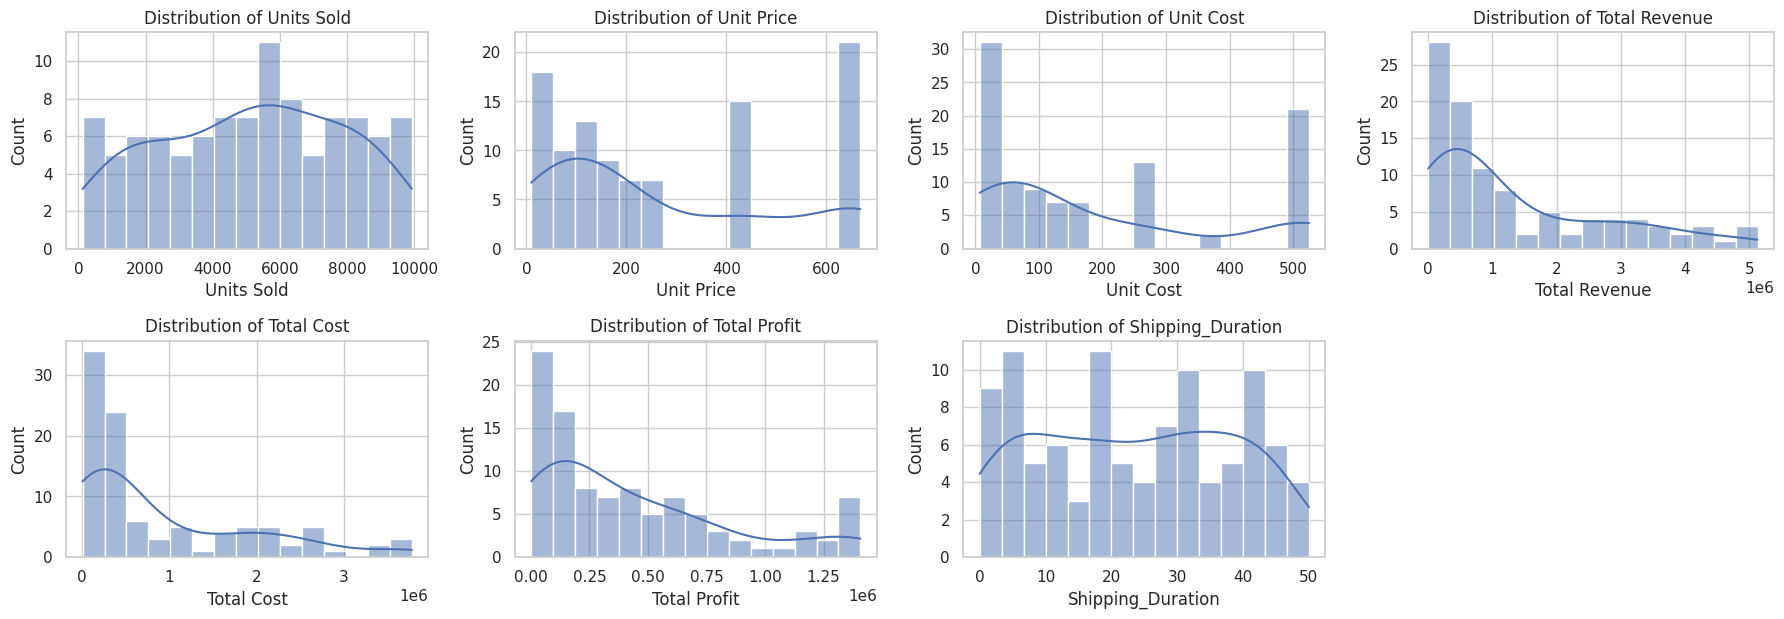

In [ ]:
#  Numerical columns
num_cols = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Shipping_Duration']

plt.figure(figsize=(18,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4,4,i)
    sns.histplot(df[col], kde=True, bins=15)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

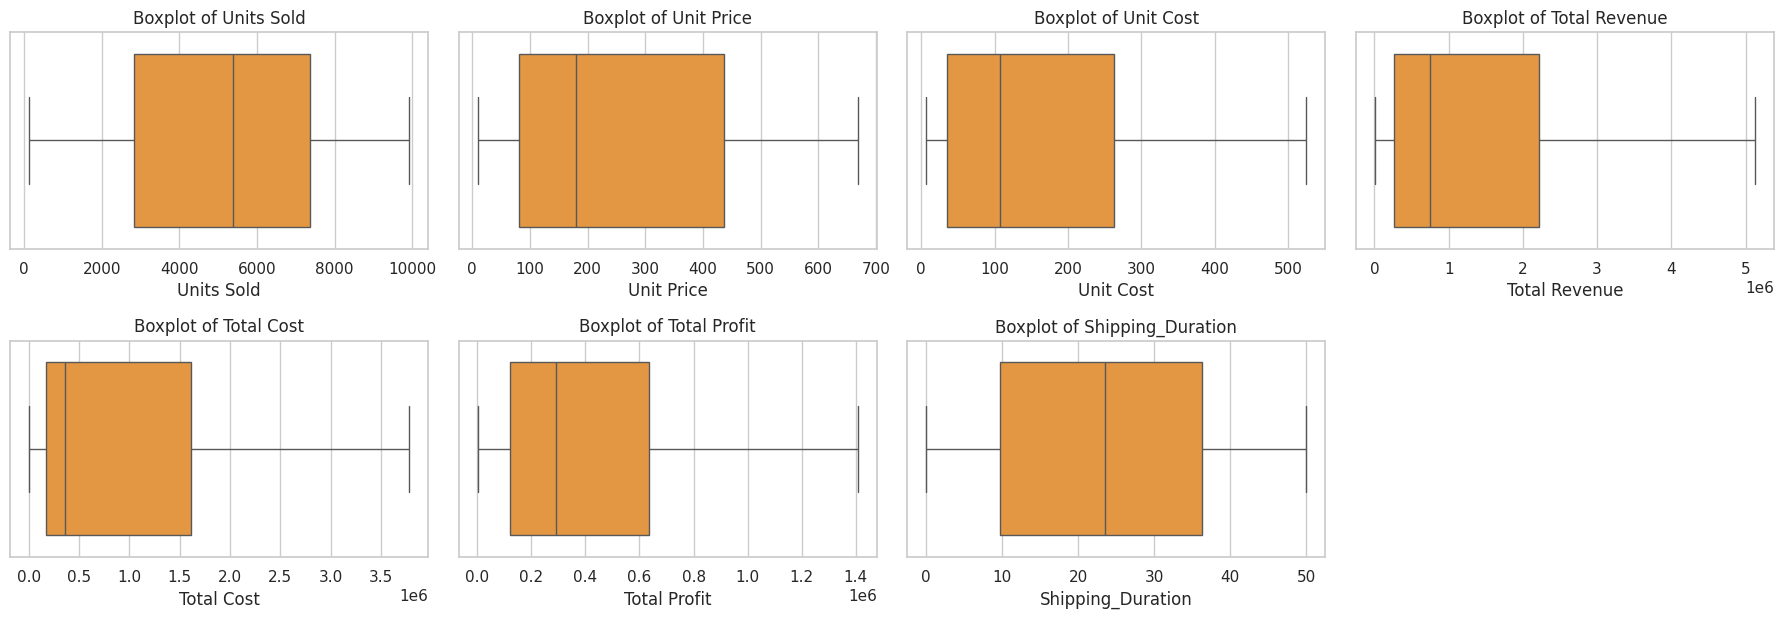

In [ ]:
# Boxplots for numerical features
plt.figure(figsize=(18,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df[col] , palette = 'YlOrBr')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

### From the univariate analysis, we observed that:

- Most numerical features like Revenue, Cost, and Profit are right-skewed, indicating a small number of very high-value transactions.

- Units Sold is fairly spread but peaks between 5,000–7,000 units.

- Categorical distributions show that Sub-Saharan Africa dominates in region count, while Cosmetics & Clothes are the most common item types.

- Sales Channel is balanced (Online ≈ Offline).

- Order Priorities are fairly distributed, with slightly higher "High" priority orders.

- This indicates diversity in product sales, but also a concentration in certain regions and product types.

# Section 5: Bivariate Analysis

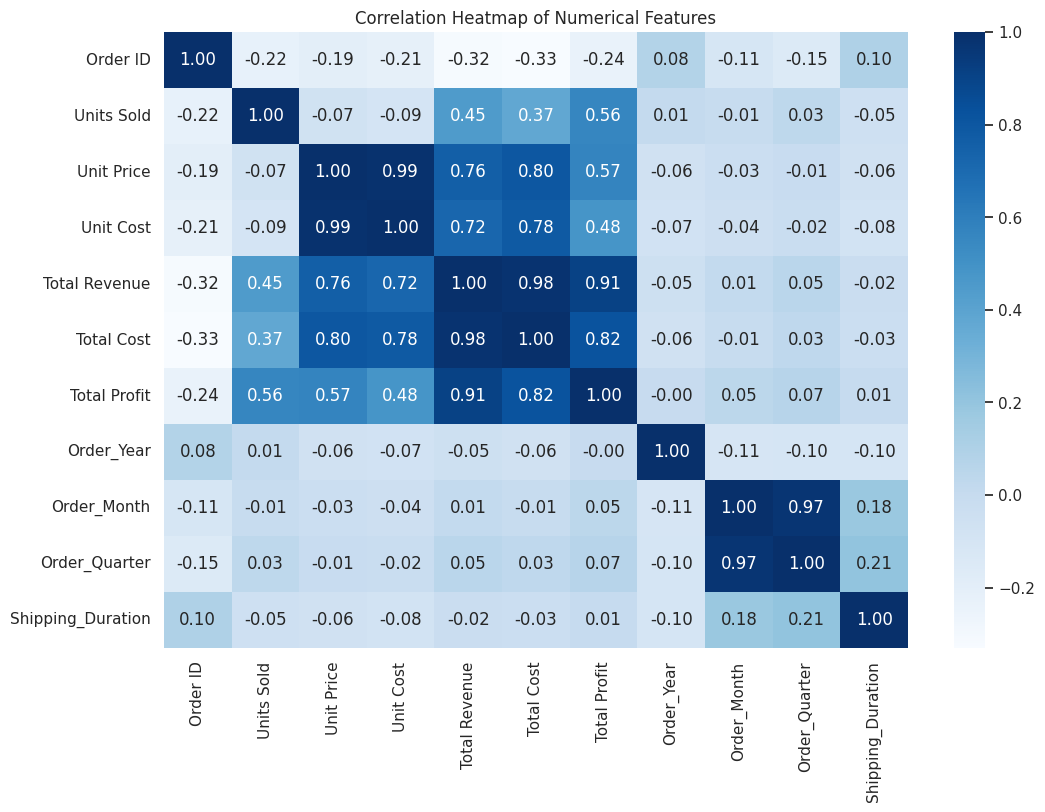

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

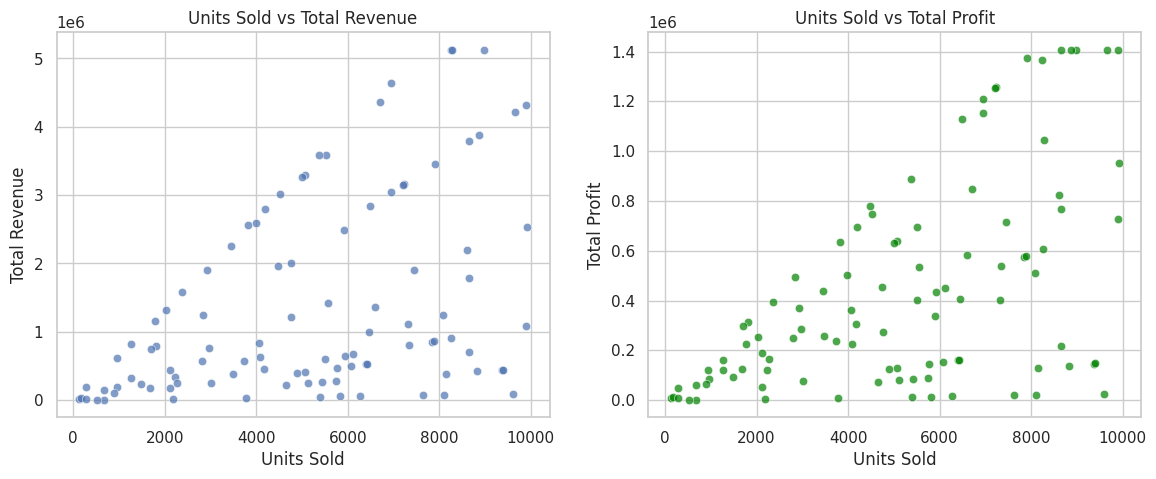

In [ ]:
# Scatterplots: Revenue & Profit
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.scatterplot(x="Units Sold", y="Total Revenue", data=df, alpha=0.7)
plt.title("Units Sold vs Total Revenue")

plt.subplot(1,2,2)
sns.scatterplot(x="Units Sold", y="Total Profit", data=df, alpha=0.7, color="green")
plt.title("Units Sold vs Total Profit")

plt.show()

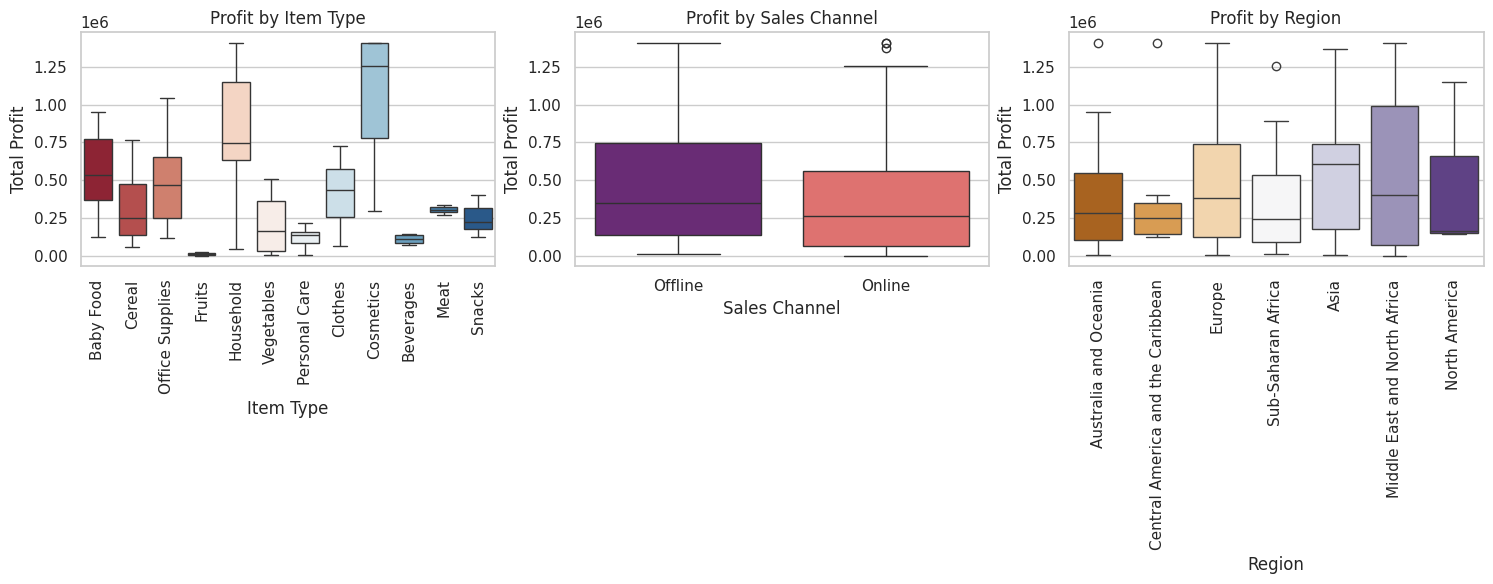

In [ ]:
# Boxplots: Profit across Factors
plt.figure(figsize=(15,6))

plt.subplot(1,3,2)
sns.boxplot(x="Sales Channel", y="Total Profit", data=df , palette = 'magma')
plt.title("Profit by Sales Channel")

plt.subplot(1,3,1)
sns.boxplot(x="Item Type", y="Total Profit", data=df , palette = 'RdBu')
plt.xticks(rotation=90)
plt.title("Profit by Item Type")

plt.subplot(1,3,3)
sns.boxplot(x="Region", y="Total Profit", data=df , palette = 'PuOr')
plt.xticks(rotation=90)
plt.title("Profit by Region")

plt.tight_layout()
plt.show()

# Section 6: Multivariate Analysis

In [ ]:
# Profitability Summaries

region_summary = df.groupby("Region")[["Total Revenue","Total Profit"]].sum().round(2).sort_values("Total Profit", ascending=False)
item_summary = df.groupby("Item Type")[["Total Revenue","Total Profit"]].sum().round(2).sort_values("Total Profit", ascending=False)
channel_summary = df.groupby("Sales Channel")[["Total Revenue","Total Profit"]].sum().round(2)

print("===== Profitability by Region =====")
print(region_summary, "\n")

print("===== Profitability by Item Type =====")
print(item_summary, "\n")

print("===== Sales Channel Summary =====")
print(channel_summary, "\n")

===== Profitability by Region =====
                                   Total Revenue  Total Profit
Region                                                        
Sub-Saharan Africa                   39672031.43   12183211.40
Europe                               33099384.73   10850158.52
Asia                                 20960893.41    6113845.87
Middle East and North Africa         14052706.58    5448676.44
Australia and Oceania                14094265.13    4451025.67
Central America and the Caribbean     8300360.40    2767053.45
North America                         5643356.55    1457942.76 

===== Profitability by Item Type =====
                 Total Revenue  Total Profit
Item Type                                   
Cosmetics          36601509.60   13739618.77
Household          28633489.58    7332751.31
Office Supplies    30315832.69    5929583.75
Clothes             7787292.80    5233334.40
Baby Food          10350327.60    3886643.70
Cereal              5322898.90    2292443

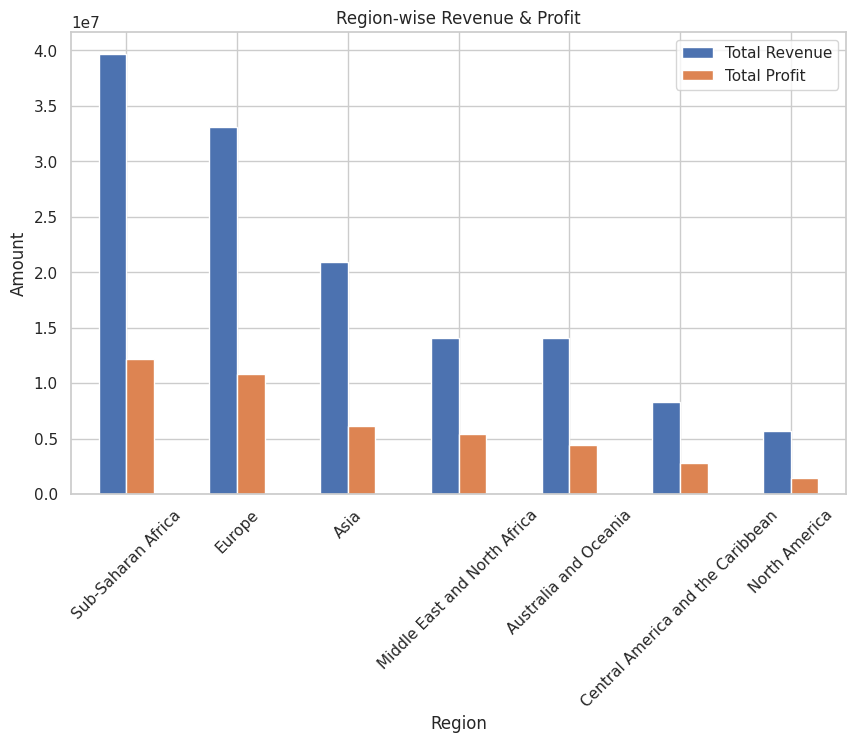

In [ ]:
# Region-wise Revenue & Profit

region_summary.plot(kind="bar", figsize=(10,6))
plt.title("Region-wise Revenue & Profit")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()

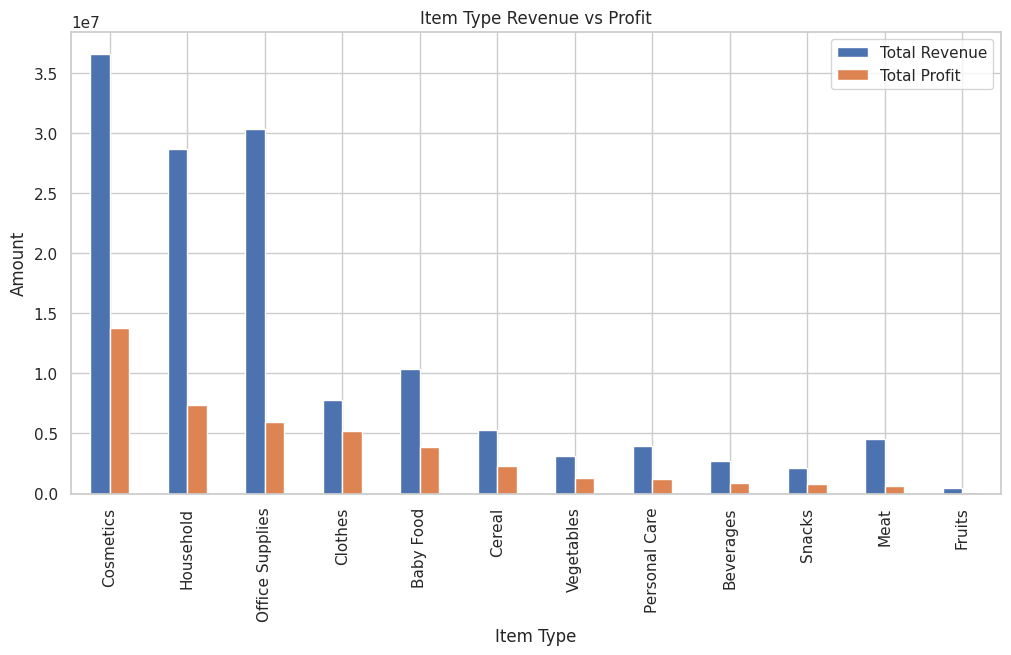

In [ ]:
# 3. Item Type vs Profitability

item_summary.plot(kind="bar", figsize=(12,6))
plt.title("Item Type Revenue vs Profit")
plt.ylabel("Amount")
plt.xticks(rotation=90)
plt.show()

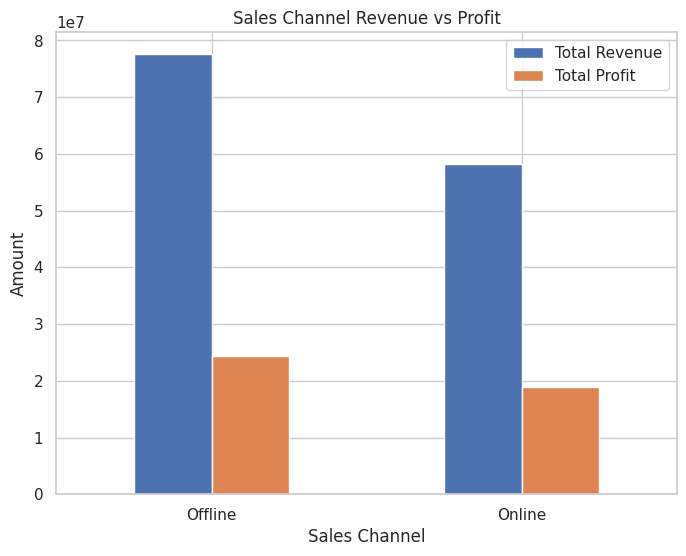

In [ ]:
# 4. Sales Channel Comparison

channel_summary.plot(kind="bar", figsize=(8,6))
plt.title("Sales Channel Revenue vs Profit")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()

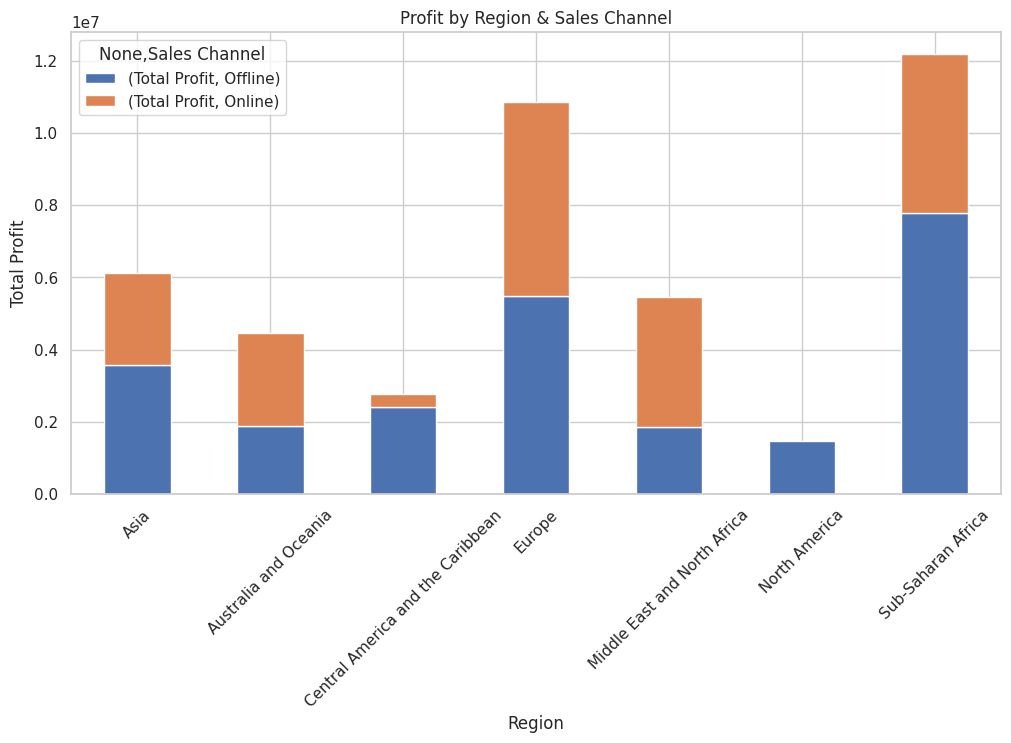

In [ ]:
# 5. Region vs Sales Channel

region_channel = df.groupby(["Region","Sales Channel"])[["Total Profit"]].sum().unstack().fillna(0).round(2)

region_channel.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Profit by Region & Sales Channel")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

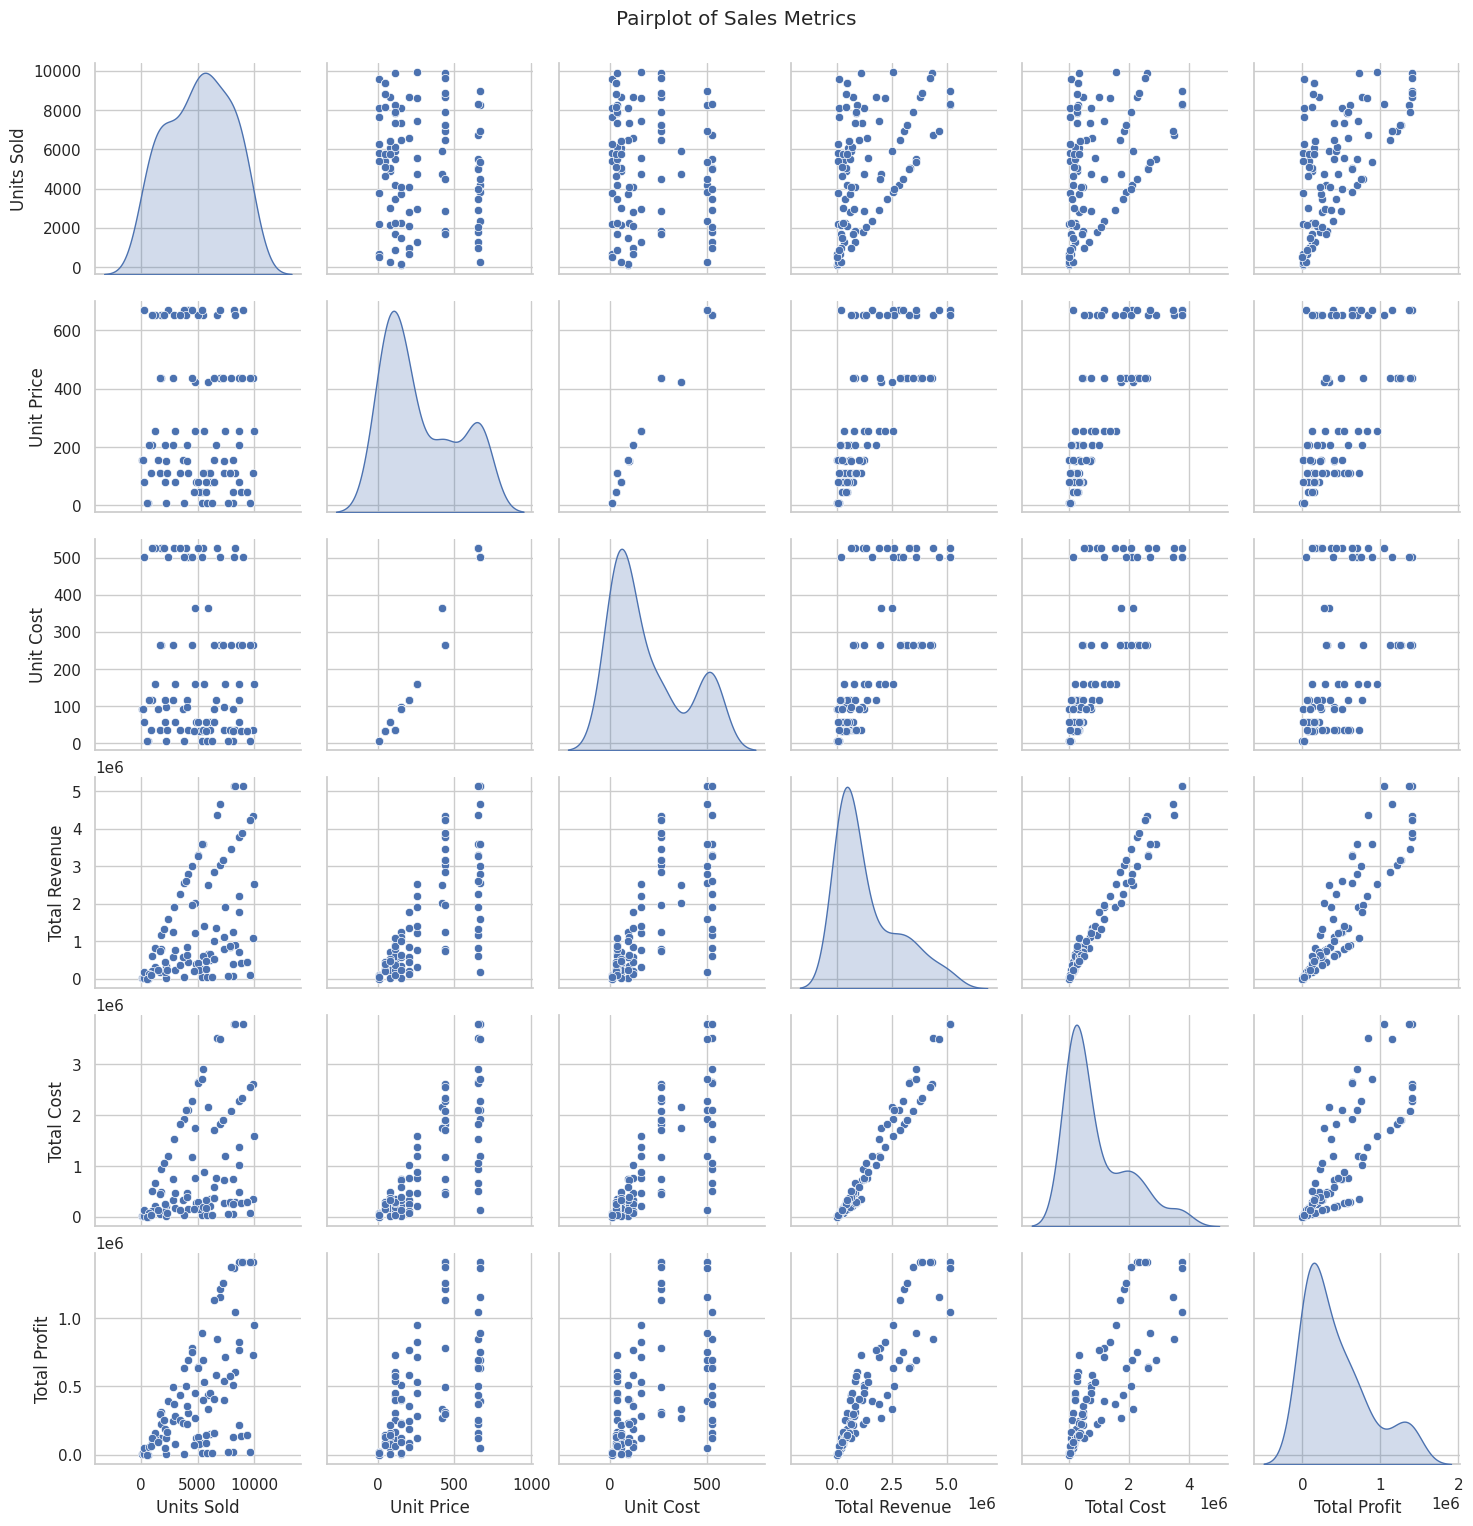

In [ ]:
# Pairplot of Key Metrics

sns.pairplot(
    df[["Units Sold","Unit Price","Unit Cost","Total Revenue","Total Cost","Total Profit"]],
    diag_kind="kde"
)
plt.suptitle("Pairplot of Sales Metrics", y=1.02)
plt.show()

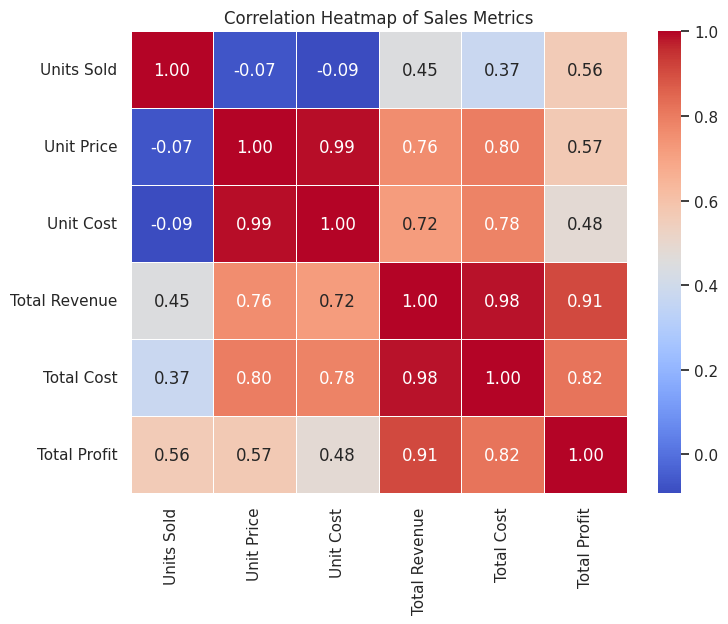

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(8,6))
corr = df[["Units Sold","Unit Price","Unit Cost","Total Revenue","Total Cost","Total Profit"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Sales Metrics")
plt.show()

### Bivariate & Multivariate Summary

- Profitability by Region: Sub-Saharan Africa and Europe are the most profitable regions, while North America contributes the least.

- Profitability by Item Type: Cosmetics dominates with the highest revenue and profit, followed by Household and Office Supplies. Fruits and Meat remain the least profitable.

- Sales Channel Insights: Offline sales generate more revenue and profit compared to online, showing traditional channels remain stronger in this dataset.

- Boxplots show variability across categories — Cosmetics and Clothes show higher profit spread, while Fruits and Meat remain low and stable.

- Correlation Heatmap reveals:

  - Strong positive correlation between Unit Price & Unit Cost (near-perfect, ~0.99).

  - Total Revenue and Total Profit are highly correlated (~0.91).

  - Units Sold and Profit show a moderate relationship, indicating profitability is influenced more by price/cost margins than sheer volume.

  - Pair Plots confirm clusters: higher profits are associated with higher unit prices and costs, reinforcing the impact of pricing strategy.

# Section 7: Time Series / Trend Analysis

In [ ]:
df.sample()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Year,Order_Month,Order_Quarter,Shipping_Duration
91,Australia and Oceania,Australia,Beverages,Offline,H,2014-07-07,240470397,2014-07-11,9389.0,47.45,31.79,445508.05,298476.31,147031.74,2014,7,3,4.0


In [ ]:
df[["Order Date","Ship Date","Order_Year","Order_Month","Order_Quarter","Shipping_Duration"]].head()

,Order Date,Ship Date,Order_Year,Order_Month,Order_Quarter,Shipping_Duration
0,2010-05-28,2010-06-27,2010,5,2,30.0
1,2012-08-22,2012-09-15,2012,8,3,24.0
2,2014-05-02,2014-05-08,2014,5,2,6.0
3,2014-06-20,2014-07-05,2014,6,2,15.0
4,2013-02-01,2013-02-06,2013,2,1,5.0


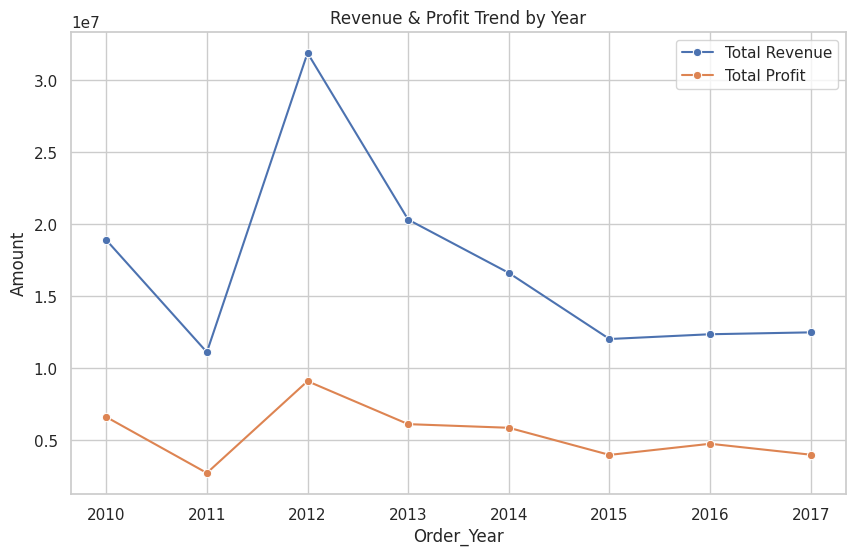

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby("Order_Year")[["Total Revenue","Total Profit"]].sum().reset_index(),
             x="Order_Year", y="Total Revenue", marker="o", label="Total Revenue")
sns.lineplot(data=df.groupby("Order_Year")[["Total Revenue","Total Profit"]].sum().reset_index(),
             x="Order_Year", y="Total Profit", marker="o", label="Total Profit")
plt.title("Revenue & Profit Trend by Year")
plt.ylabel("Amount")
plt.legend()
plt.show()

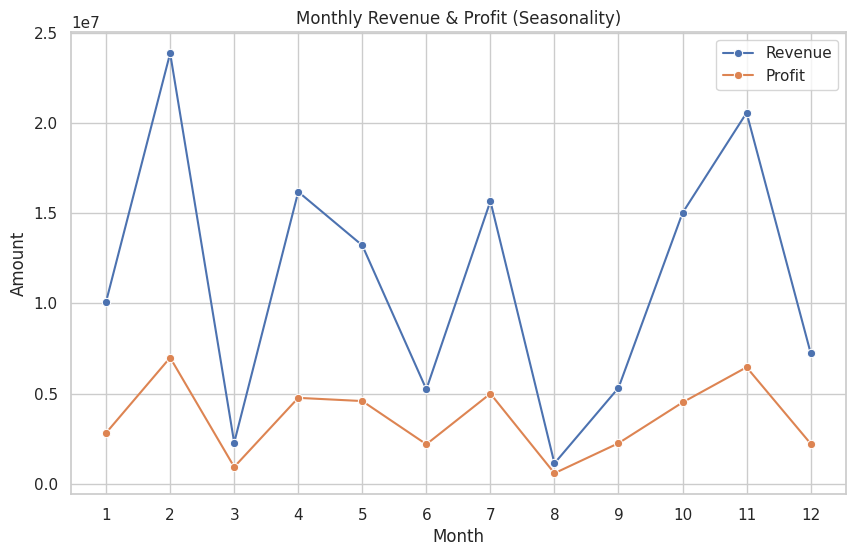

In [ ]:
monthly = df.groupby("Order_Month")[["Total Revenue","Total Profit"]].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly, x="Order_Month", y="Total Revenue", marker="o", label="Revenue")
sns.lineplot(data=monthly, x="Order_Month", y="Total Profit", marker="o", label="Profit")
plt.title("Monthly Revenue & Profit (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.xticks(range(1,13))
plt.legend()
plt.show()

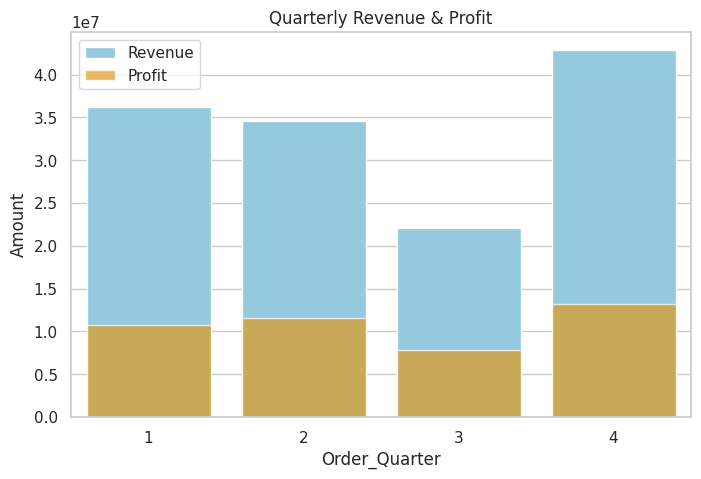

In [ ]:
quarterly = df.groupby("Order_Quarter")[["Total Revenue","Total Profit"]].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=quarterly, x="Order_Quarter", y="Total Revenue", color="skyblue", label="Revenue")
sns.barplot(data=quarterly, x="Order_Quarter", y="Total Profit", color="orange", alpha=0.7, label="Profit")
plt.title("Quarterly Revenue & Profit")
plt.ylabel("Amount")
plt.legend()
plt.show()

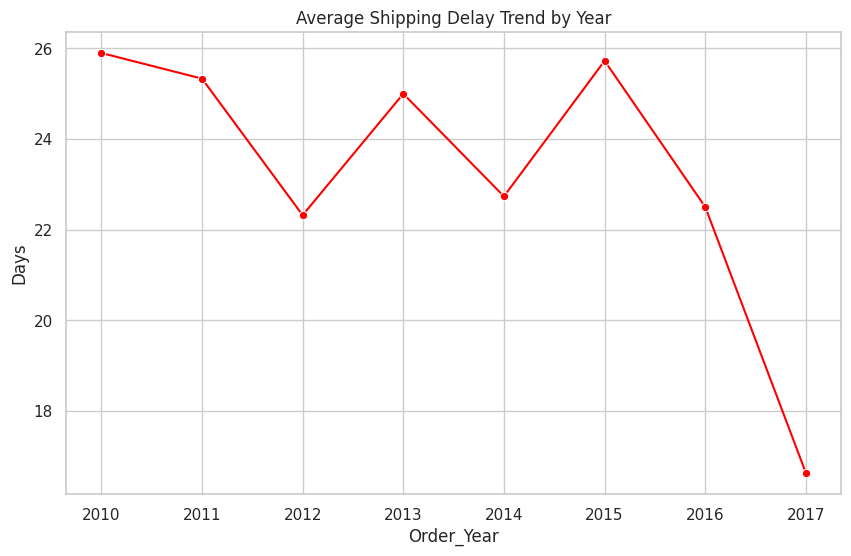

In [ ]:
delay_trend = df.groupby("Order_Year")["Shipping_Duration"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=delay_trend, x="Order_Year", y="Shipping_Duration", marker="o", color="red")
plt.title("Average Shipping Delay Trend by Year")
plt.ylabel("Days")
plt.show()

# Section 8: Hypothesis Testing

### Q1. Do all regions generate the same mean profit, or are some regions significantly more profitable?

H0: Mean profit is equal across all regions.

H1: At least one region has a different mean profit.

Assumptions to check:

Independence -> each order is independent.

Normality -> Shapiro-Wilk test on residuals OR profit distribution per region.

Homogeneity of variance -> Levene's Test.

In [ ]:
df.Region.unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

In [ ]:
from scipy.stats import shapiro, levene, f_oneway

# Normality check
AustraliaR = df[df['Region'] == 'Australia and Oceania']['Total Profit']
CentralAmericaR = df[df['Region'] == 'Central America and the Caribbean']['Total Profit']
EuropeR = df[df['Region'] == 'Europe']['Total Profit']
NorthAmericaR = df[df['Region'] == 'North America']['Total Profit']
SubSaharanAfricaR = df[df['Region'] == 'Sub-Saharan Africa']['Total Profit']
AsiaR = df[df['Region'] == 'Asia']['Total Profit']
MiddleEastR = df[df['Region'] == 'Middle East and North Africa']['Total Profit']

# Shapiro
def normalitycheck(x):
    stat, p = shapiro(x)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian\n')
    else:
        print('Probably not Gaussian\n')

normalitycheck(AustraliaR)
normalitycheck(CentralAmericaR)
normalitycheck(EuropeR)
normalitycheck(NorthAmericaR)
normalitycheck(SubSaharanAfricaR)
normalitycheck(AsiaR)
normalitycheck(MiddleEastR)

Statistics=0.838, p=0.030
Probably not Gaussian

Statistics=0.649, p=0.001
Probably not Gaussian

Statistics=0.860, p=0.005
Probably not Gaussian

Statistics=0.762, p=0.027
Probably not Gaussian

Statistics=0.890, p=0.002
Probably not Gaussian

Statistics=0.930, p=0.415
Probably Gaussian

Statistics=0.870, p=0.099
Probably Gaussian



In [ ]:
# Variance homogeneity check
stat, p = levene(AustraliaR , CentralAmericaR , EuropeR , NorthAmericaR , SubSaharanAfricaR , AsiaR , MiddleEastR)
print("Levene’s Test p-value:", p)

Levene’s Test p-value: 0.48802037973360557


ANOVA assumptions require approximate normality of residuals.

But Shapiro suggests that many groups are not Gaussian -> violates assumption.

With large enough sample sizes (n > 30 per group), ANOVA is robust to non-normality due to Central Limit Theorem.

If some groups are small and non-normal -> ANOVA is not reliable -> switch to Kruskal-Wallis test (non-parametric ANOVA alternative).

In [ ]:
df['Region'].value_counts()

,count
Region,
Sub-Saharan Africa,36
Europe,22
Australia and Oceania,11
Asia,11
Middle East and North Africa,10
Central America and the Caribbean,7
North America,3


In [ ]:
from scipy.stats import kruskal

stat, p = kruskal(AustraliaR, CentralAmericaR, EuropeR, NorthAmericaR,
                  SubSaharanAfricaR, AsiaR, MiddleEastR)

print("Kruskal-Wallis Test p-value:", p)

Kruskal-Wallis Test p-value: 0.9336021346943686


p > 0.05 -> fail to reject H0 -> no significant difference

### Q2. Do all item types yield the same profit, or do some categories stand out?

Test -> One-Way ANOVA (or Kruskal-Wallis if assumptions fail)

H0: Mean profit is the same across item types.

H1: At least one item type differs.

In [ ]:
df['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [ ]:
BabyItem = df[df['Item Type'] == 'Baby Food']['Total Profit']
HouseholdItem = df[df['Item Type'] == 'Household']['Total Profit']
OfficeSuppliesItem = df[df['Item Type'] == 'Office Supplies']['Total Profit']
ClothesItem = df[df['Item Type'] == 'Clothes']['Total Profit']
CosmeticsItem = df[df['Item Type'] == 'Cosmetics']['Total Profit']
FruitsItem = df[df['Item Type'] == 'Fruits']['Total Profit']
VegetableItems = df[df['Item Type'] == 'Vegetables']['Total Profit']
MeatItem = df[df['Item Type'] == 'Meat']['Total Profit']
CeralsItems = df[df['Item Type'] == 'Cereal']['Total Profit']
PersonalCareItem = df[df['Item Type'] == 'Personal Care']['Total Profit']
BevariagesItem = df[df['Item Type'] == 'Beverages']['Total Profit']
SnacksItem = df[df['Item Type'] == 'Snacks']['Total Profit']

In [ ]:
normalitycheck(BabyItem)
normalitycheck(HouseholdItem)
normalitycheck(OfficeSuppliesItem)
normalitycheck(ClothesItem)
normalitycheck(CosmeticsItem)
normalitycheck(FruitsItem)
normalitycheck(VegetableItems)
normalitycheck(MeatItem)
normalitycheck(CeralsItems)
normalitycheck(PersonalCareItem)
normalitycheck(BevariagesItem)
normalitycheck(SnacksItem)

Statistics=0.977, p=0.943
Probably Gaussian

Statistics=0.961, p=0.807
Probably Gaussian

Statistics=0.957, p=0.740
Probably Gaussian

Statistics=0.957, p=0.710
Probably Gaussian

Statistics=0.779, p=0.004
Probably not Gaussian

Statistics=0.946, p=0.624
Probably Gaussian

Statistics=0.892, p=0.329
Probably Gaussian

Statistics=nan, p=nan
Probably not Gaussian

Statistics=0.912, p=0.408
Probably Gaussian

Statistics=0.948, p=0.645
Probably Gaussian

Statistics=0.840, p=0.076
Probably Gaussian

Statistics=0.976, p=0.704
Probably Gaussian



In [ ]:
anova_stat , pval = f_oneway(BabyItem , HouseholdItem , OfficeSuppliesItem , ClothesItem , CosmeticsItem , FruitsItem , VegetableItems , MeatItem , CeralsItems , PersonalCareItem , BevariagesItem , SnacksItem)
print("ANOVA p-value:", pval)
if pval < 0.05:
    print("Reject H0: Mean profit is the same across item types.")
else:
    print("Fail to reject H0: Mean profit is the same across item types.")

ANOVA p-value: 2.3625374125243236e-14
Reject H0: Mean profit is the same across item types.


### Q3. Is there a relationship between Sales Channel and Order Priority?

Test -> Chi-Square Test of Independence

H0: Sales channel and order priority are independent.

H1: They are dependent.

In [ ]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df["Sales Channel"], df["Order Priority"])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Test p-value:", p)
print("\nExpected Frequencies:\n", expected)
if pval > 0.05:
    print("\n\nFail to reject H0: Sales channel and order priority are independent.")
else:
    print("\n\nReject H0: Sales channel and order priority are dependent.")

Chi-Square Test p-value: 0.42607181899897484

Expected Frequencies:
 [[11.  15.  13.5 10.5]
 [11.  15.  13.5 10.5]]


Reject H0: Sales channel and order priority are dependent.


### Q4. Is Total Profit correlated with Total Revenue?

Test -> Pearson Correlation

H0: No correlation between revenue and profit.

H1: Significant correlation exists.

In [ ]:
from scipy.stats import pearsonr

corr, p = pearsonr(df["Total Revenue"], df["Total Profit"])
print("Correlation:", corr, "p-value:", p)
if p > 0.05:
    print("\n\nFail to reject H0: No correlation between revenue and profit.")
else:
    print("\n\nReject H0: Significant correlation exists.")

Correlation: 0.9073819088565175 p-value: 1.1377394085578502e-38


Reject H0: Significant correlation exists.


# Insights

- Profitability Across Regions

  - The Kruskal-Wallis test showed no significant difference in average profit across regions. This means profitability is similar across locations, suggesting consistent market presence.

- Profitability Across Item Types

  - The ANOVA test (p < 0.05) showed significant differences in profit across item categories. Some product categories, like Baby Food, Cosmetics, and Beverages, contribute more to profits, while others perform below expectations.

- Correlation Between Variables

  - The correlation between Units Sold and Total Revenue is very strong (r ≈ 0.91, p < 0.001). This confirms that increasing sales volume directly boosts revenue, making demand forecasting important.

- Chi-Square Test for Categorical Variables

  - The Chi-square test indicated no strong association between the categorical features tested (p > 0.05). This suggests that sales distribution across categories may not strongly depend on these categorical variables.

- Time Series / Trend Analysis

  - Sales and profits show clear seasonal changes. Some periods have higher demand, likely due to holiday-related spikes. Identifying and using these seasonal peaks can aid in optimizing inventory and supply chains.

- Outliers & Data Quality

  - Outliers were identified and managed using IQR. The data is fairly clean after preprocessing, making it suitable for dashboarding and predictive modeling.

# Recemmendations

- Product Strategy

  - Focus on high-margin, high-profit categories like Baby Food, Cosmetics, and Beverages.

  - Re-evaluate low-performing categories. Optimize pricing, reduce costs, or consider discontinuing them.

- Regional Strategy

  - Since profits are consistent across regions, similar strategies can work globally.

  - However, targeted campaigns can still take advantage of cultural and seasonal trends in each region.

- Demand Forecasting

  - A strong link between Units Sold and Revenue shows a clear chance to build demand forecasting models.

  - This will improve production, reduce stockouts, and lessen overstock.

- Seasonal Sales Optimization

  - Use time series insights to coordinate marketing campaigns, inventory stocking, and logistics with peak demand times.

  - For example, boost marketing before festive seasons or high-demand months.

- Data-Driven Decision Making

  - Continuously track profitability by category and region using Tableau dashboards to spot emerging trends.

  - Use A/B testing for promotional strategies on categories that are underperforming.